In [1]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns
import pandas as pd
from matplotlib import gridspec

# ESR

## Dados coletados

In [2]:
f = np.array([50.001,52.501, 55.000, 57.500, 60.001, 62.504, 65.002, 67.500, 70.001, 72.447]) #MHz

sigma_f = np.full(len(f), 0.001) #MHz

delta_V = np.array([4.9, 5.2, 5.4, 5.6, 5.9, 6.1, 6.4, 6.7, 6.9, 7.1])/10 #V

sigma_dV = np.array([0.1, 0.2, 0.2, 0.2, 0.1, 0.1, 0.2, 0.1, 0.1, 0.1])/10 #V


## O campo magnético e sua incerteza

Nós sabemos que:

$$B_R = 3.67 U_R \ (mT)$$

Propagando o erro de $U_r$:

$$\sigma_{B_R} = \sqrt{\left(\frac{\partial B_R}{\partial U_R}\right)^2\sigma_{U_R}^2}$$

$$\sigma_{B_R} = \sqrt{\left(3.67\right)^2\sigma_{U_R}^2}$$

$$\sigma_{B_R} = 3.67\sigma_{U_R} \ (mT)$$

In [3]:
b_r = 3.67*delta_V #mT

sigma_b_r = 3.67*sigma_dV #mT
sigma_b_r = [float('{:g}'.format(float('{:.1g}'.format(sigma)))) for sigma in sigma_b_r]
sigma_b_r = np.array(sigma_b_r)

print(b_r)
print(sigma_b_r)

[1.7983 1.9084 1.9818 2.0552 2.1653 2.2387 2.3488 2.4589 2.5323 2.6057]
[0.04 0.07 0.07 0.07 0.04 0.04 0.07 0.04 0.04 0.04]


## Dados brutos

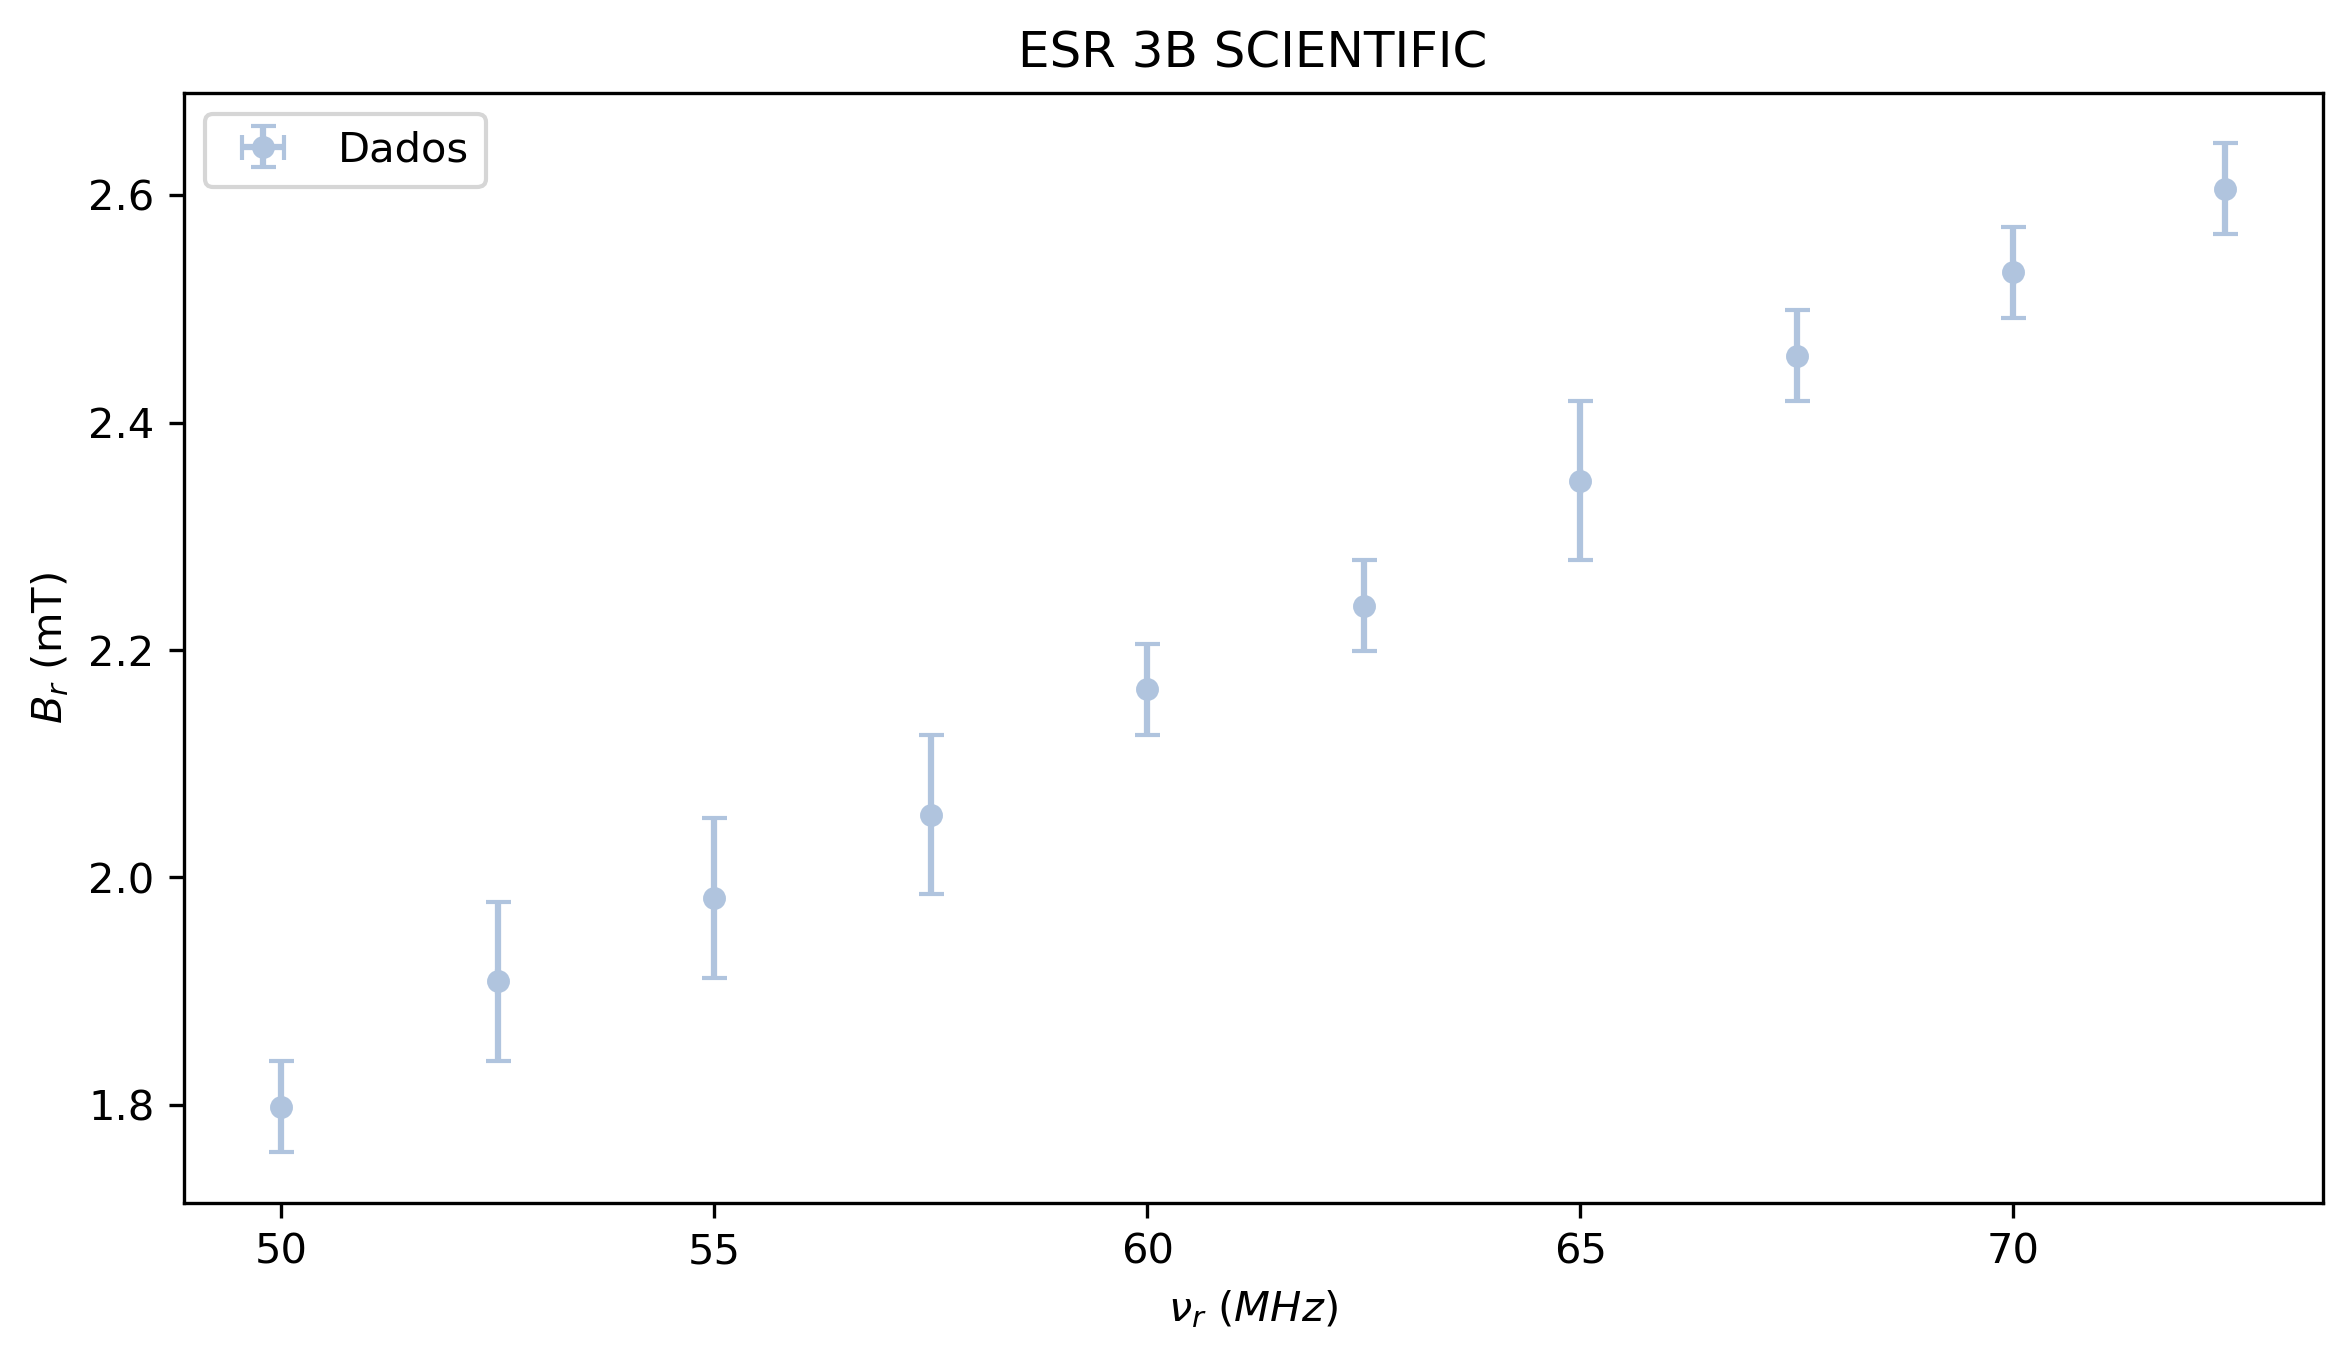

In [4]:
plt.figure(figsize = [9.2,4.9], dpi = 300) 
plt.errorbar(f,b_r,sigma_b_r,sigma_f, 'o', ms = 4.5, capsize=3, color = 'lightsteelblue', label = 'Dados')
plt.xlabel(r'$\nu_r$ ($MHz$)')
plt.ylabel(r'$B_r$ (mT)')
plt.title('ESR 3B SCIENTIFIC')
plt.legend()
plt.savefig('Graphs/ESR/Dadosbrutos_3B.pdf', dpi = 300)
plt.show()

## Ajuste linear

In [5]:
fitpars, cov_pars = np.polyfit(f,b_r,1,w=np.power(sigma_b_r,-1),cov='True')
#print(fitpars, cov_pars)

coef_angular = fitpars[0]
coef_linear = fitpars[1]
sigma_angular = np.sqrt(cov_pars[0][0])
sigma_linear = np.sqrt(cov_pars[1][1])

sigma_angular = float('{:g}'.format(float('{:.1g}'.format(sigma_angular))))
sigma_linear = float('{:g}'.format(float('{:.1g}'.format(sigma_linear))))

                     
print('Coeficiente angular: %.3f +- %.3f (mT/MHz)' % (coef_angular ,sigma_angular))
print('Coeficiente linear: %.2f +- %.2f (mT)' %(coef_linear,sigma_linear))

Coeficiente angular: 0.036 +- 0.001 (mT/MHz)
Coeficiente linear: -0.02 +- 0.04 (mT)


## Gráfico do ajuste linear

In [6]:
#Calulando chi^2_red
yhat = np.polyval(fitpars, f)
chi_squared = np.sum(((yhat - b_r)/sigma_b_r) ** 2)
chi2_red = chi_squared/(len(b_r)-2)

#Imprimindo o resultado
print("chi^2_red = %.3f" % chi2_red)

chi^2_red = 0.086


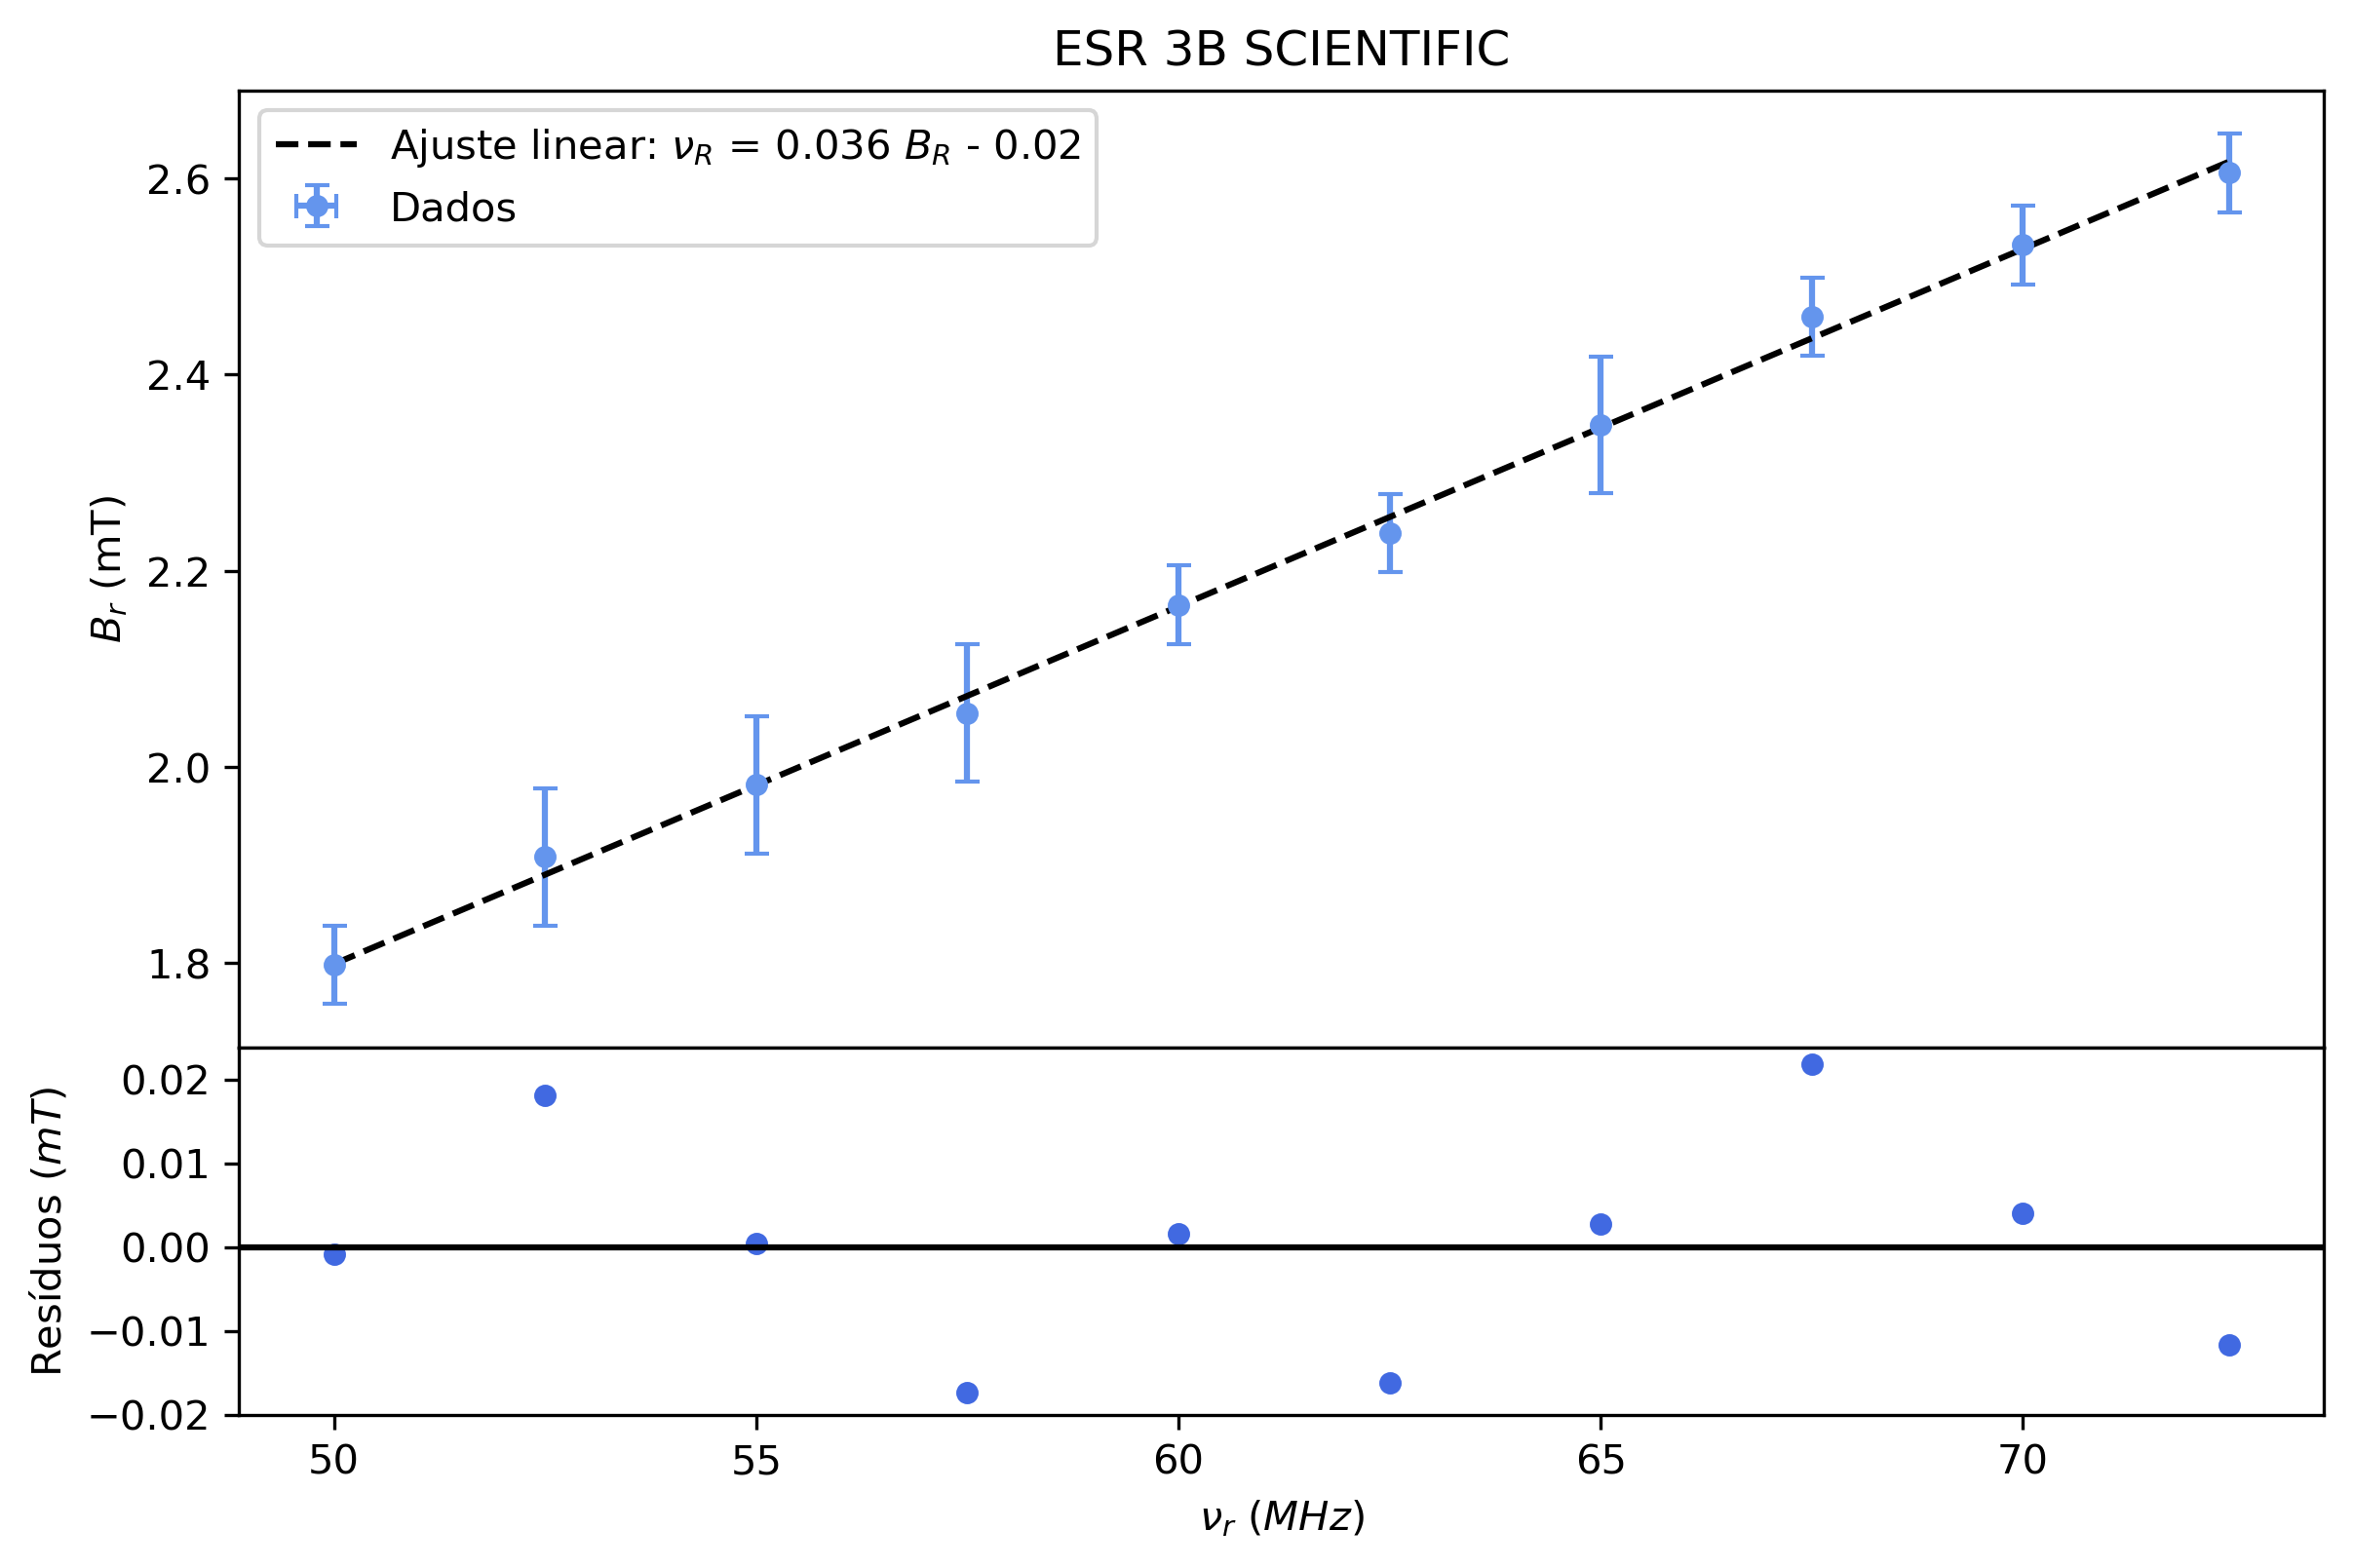

In [7]:
fig = plt.figure(figsize = [9.2,6], dpi = 300) 
gs = fig.add_gridspec(2,1, hspace=0, height_ratios=[6, 2.3])
axs = gs.subplots(sharex=True)


#Gráfico principal
axs[0] = plt.subplot(gs[0])
axs[0].errorbar(f,b_r, sigma_b_r,0, 'o', ms = 4.5, capsize=3, color = 'cornflowerblue', label = 'Dados')
axs[0].plot(f,(f*coef_angular + coef_linear), color ='black', ls = '--',
         label = r'Ajuste linear: $\nu_R$ = %.3f $B_R$ - %.2f' % (coef_angular,abs(coef_linear)))
axs[0].set_ylabel(r'$B_r$ (mT)')
axs[0].legend()
axs[0].set_title('ESR 3B SCIENTIFIC')

#Gráfico de resíduos
axs[1] = plt.subplot(gs[1])
resid = (b_r - yhat)
axs[1].plot(f, resid, 'o',ms = 4.5,  color = 'royalblue', label = 'Residuos')
axs[1].axhline(y=0, color='k', linestyle='-')
axs[1].set_ylabel(r"Resíduos ($mT$)")
axs[1].set_yticks(np.arange(-2,2.2,1.0)*1e-2)


plt.xlabel(r'$\nu_r$ ($MHz$)')
plt.savefig('Graphs/ESR/AjusteResiduos_3B.pdf', dpi = 300)

plt.show()

## O fator de Landé

O modelo teórico para este experimento é:

$$B_R = \frac{h}{g\mu_B}\nu_R$$

Note que não temos um coeficiente linear, o que está de acordo com o que encontramos, uma vez que a incerteza encontrada é maior que o próprio valor. Deste modo podemos desprezar o coeficiente linear encontrado. Assim, devemos comparar diretamente os coeficientes angulares teórico e do ajuste:

$$c_a = \frac{h}{g\mu_B}$$
$$g =\frac{h}{c_a\mu_B}$$


A incerteza associada ao fator de Landé pode ser obtida através da propagação do erro do coeficiente angular:


$$\sigma_{g} = \sqrt{\left(\frac{\partial g}{\partial c_a}\right)^2\sigma_{c_a}}$$
$$\sigma_{g} = \sqrt{\left(\frac{\partial \frac{h}{c_a\mu_B}}{\partial c_a}\right)^2\sigma_{c_a}^2}$$
$$\sigma_{g} = \sqrt{\left( \frac{h}{c_a^2\mu_B}\right)^2\sigma_{c_a}^2}$$
$$\sigma_{g} = \frac{h}{c_a^2\mu_B}\sigma_{c_a}$$

In [26]:
mu_b = 9.274e-24 #J/T
h = 6.626e-34 #Js

g = h/(mu_b * coef_angular * 1e-9)

sigma_g = h/(mu_b * (coef_angular*1e-9)**2) * (sigma_angular*1e-9)
sigma_g = float('{:g}'.format(float('{:.1g}'.format(sigma_g))))

print('g = (%.2f +- %.2f)' %(g,sigma_g))

g = (1.96 +- 0.03)


In [41]:
#g_lande = 116171491e-11*2 + 2
g_lande = 2.00231930436
print(g_lande)

2.00231930436


In [27]:
print(abs(1 - 1.96/g_lande))

0.021137159556588125


# ESR dia 07/08


## Dados


In [11]:
#Dados 

#Frequência aplicada
nu = np.array([14.8, 19.8, 24.8, 29.8, 29.8, 34.8, 39.8, 44.8, 49.8, 54.8, 59.8,
               64.8, 69.8, 69.8, 74.8, 79.8, 84.8, 89.8, 94.8]) #MHz



#Corrente nas bobinas de Helmholtz
i = np.array([0.142, 0.179, 0.234, 0.265, 0.265, 0.309, 0.350, 0.395, 0.433, 0.475, 
              0.535, 0.575, 0.625, 0.625, 0.655, 0.704, 0.745, 0.786, 0.832 ]) #A

#Incerteza da corrente
sigma_i = np.full(len(i), 0.005) #A ou 0.001

In [12]:
print(len(i))

print(len(nu))

19
19


## Calculando o campo magnético e sua incerteza

Nós sabemos que:

$$B = 4.23 I \ (mT/A)$$

Propagando o erro da corrente $I$ aplicada nas bobinas:

$$\sigma_{B} = \sqrt{\left(\frac{\partial B}{\partial I}\right)^2\sigma_{I}^2}$$

$$\sigma_{B} = \sqrt{\left(4.23\right)^2\sigma_{I}^2}$$

$$\sigma_{B} = 4.23\sigma_{I} \ (mT/A)$$


In [13]:
b = 4.23*i #mT

sigma_b = 4.23*sigma_i #mT
sigma_b = [float('{:g}'.format(float('{:.1g}'.format(sigma)))) for sigma in sigma_b]


print(np.round(b,2))
print(sigma_b)

[0.6  0.76 0.99 1.12 1.12 1.31 1.48 1.67 1.83 2.01 2.26 2.43 2.64 2.64
 2.77 2.98 3.15 3.32 3.52]
[0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02]


## Gráfico dos dados

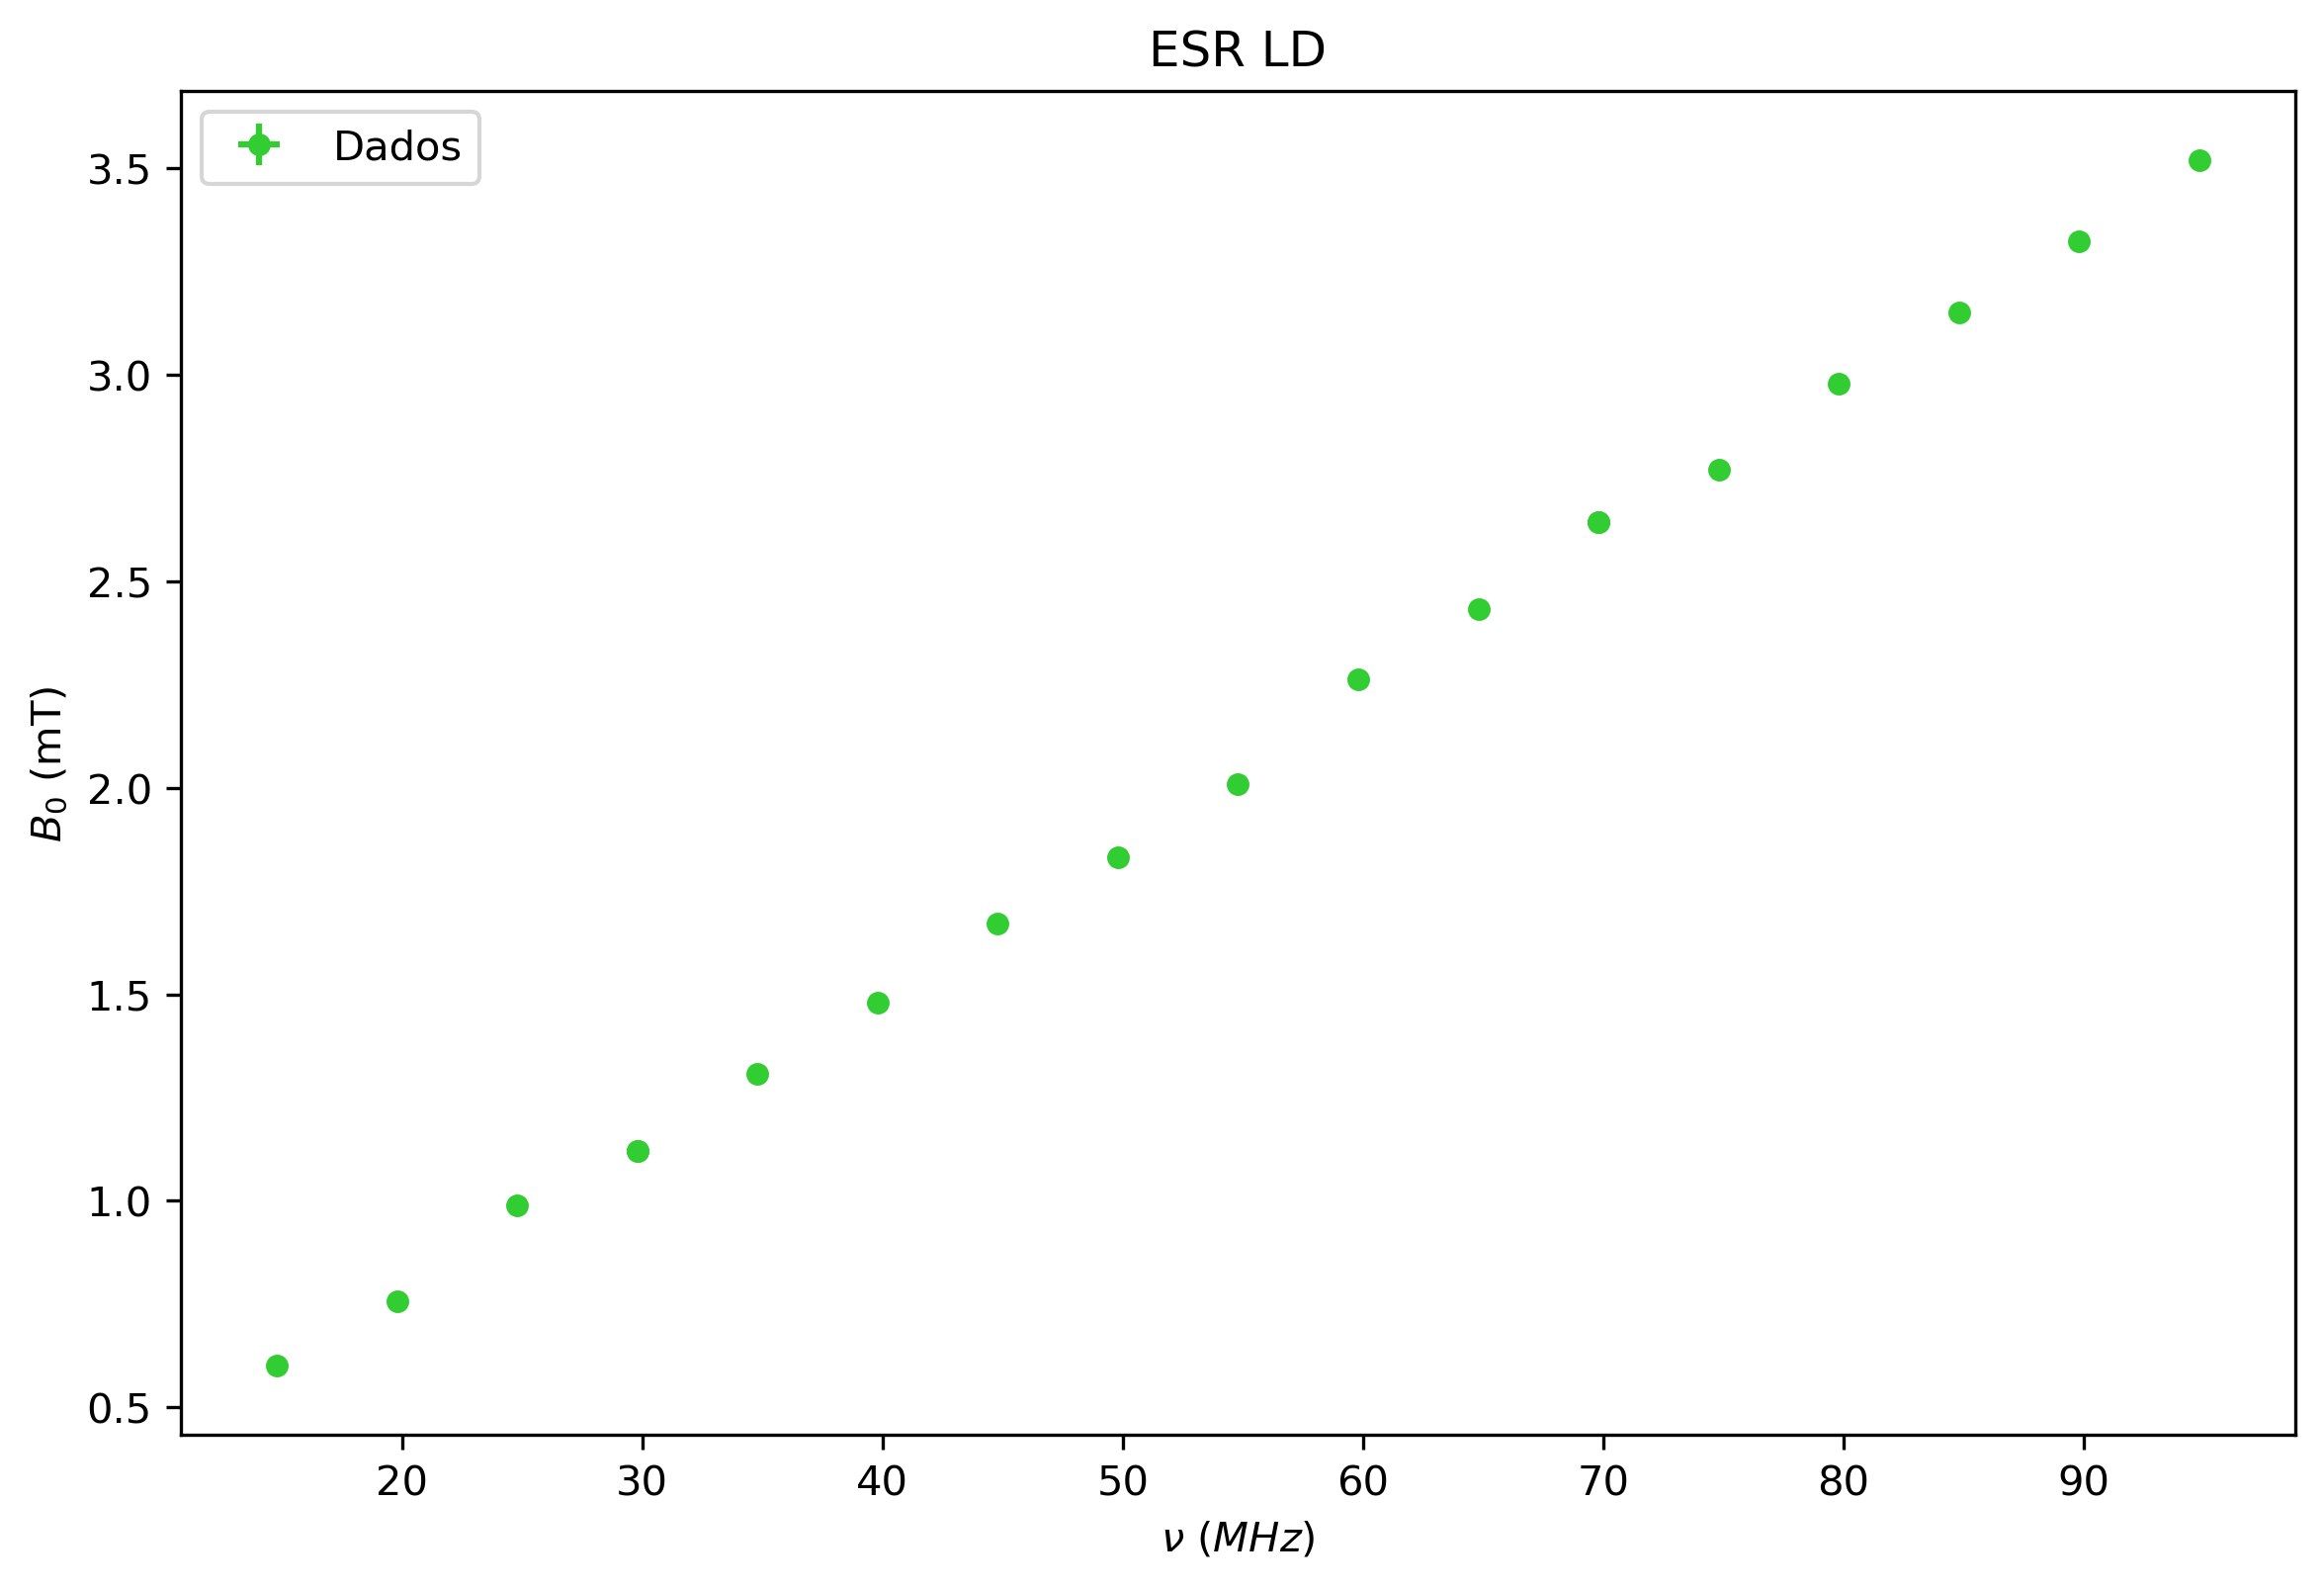

In [14]:
fig = plt.figure(figsize = [9.2,6], dpi = 300) 
plt.errorbar(nu, b, sigma_b, 0, 'o', ms = 4.5, color = 'limegreen', label = 'Dados')
plt.xlabel(r'$\nu$ ($MHz$)')
plt.ylabel(r'$B_0$ (mT)')
plt.legend()
plt.title('ESR LD')
plt.savefig('Graphs/ESR/Dadosbrutos_LD.pdf', dpi = 300)

plt.show()

In [15]:
fitpars1, cov_pars1 = np.polyfit(nu,b,1,w=np.power(sigma_b,-1),cov='True')
#print(fitpars, cov_pars)

coef_angular1 = fitpars1[0]
coef_linear1 = fitpars1[1]
sigma_angular1 = np.sqrt(cov_pars1[0][0])
sigma_linear1 = np.sqrt(cov_pars1[1][1])

sigma_angular1 = float('{:g}'.format(float('{:.1g}'.format(sigma_angular1))))
sigma_linear1 = float('{:g}'.format(float('{:.1g}'.format(sigma_linear1))))

                     
print('Coeficiente angular: %.4f +- %.4f (mT/MHz)' % (coef_angular1 ,sigma_angular1))
print('Coeficiente linear: %.2f +- %.2f (mT)' %(coef_linear1,sigma_linear1))

Coeficiente angular: 0.0368 +- 0.0002 (mT/MHz)
Coeficiente linear: 0.04 +- 0.01 (mT)


chi^2_red = 1.603


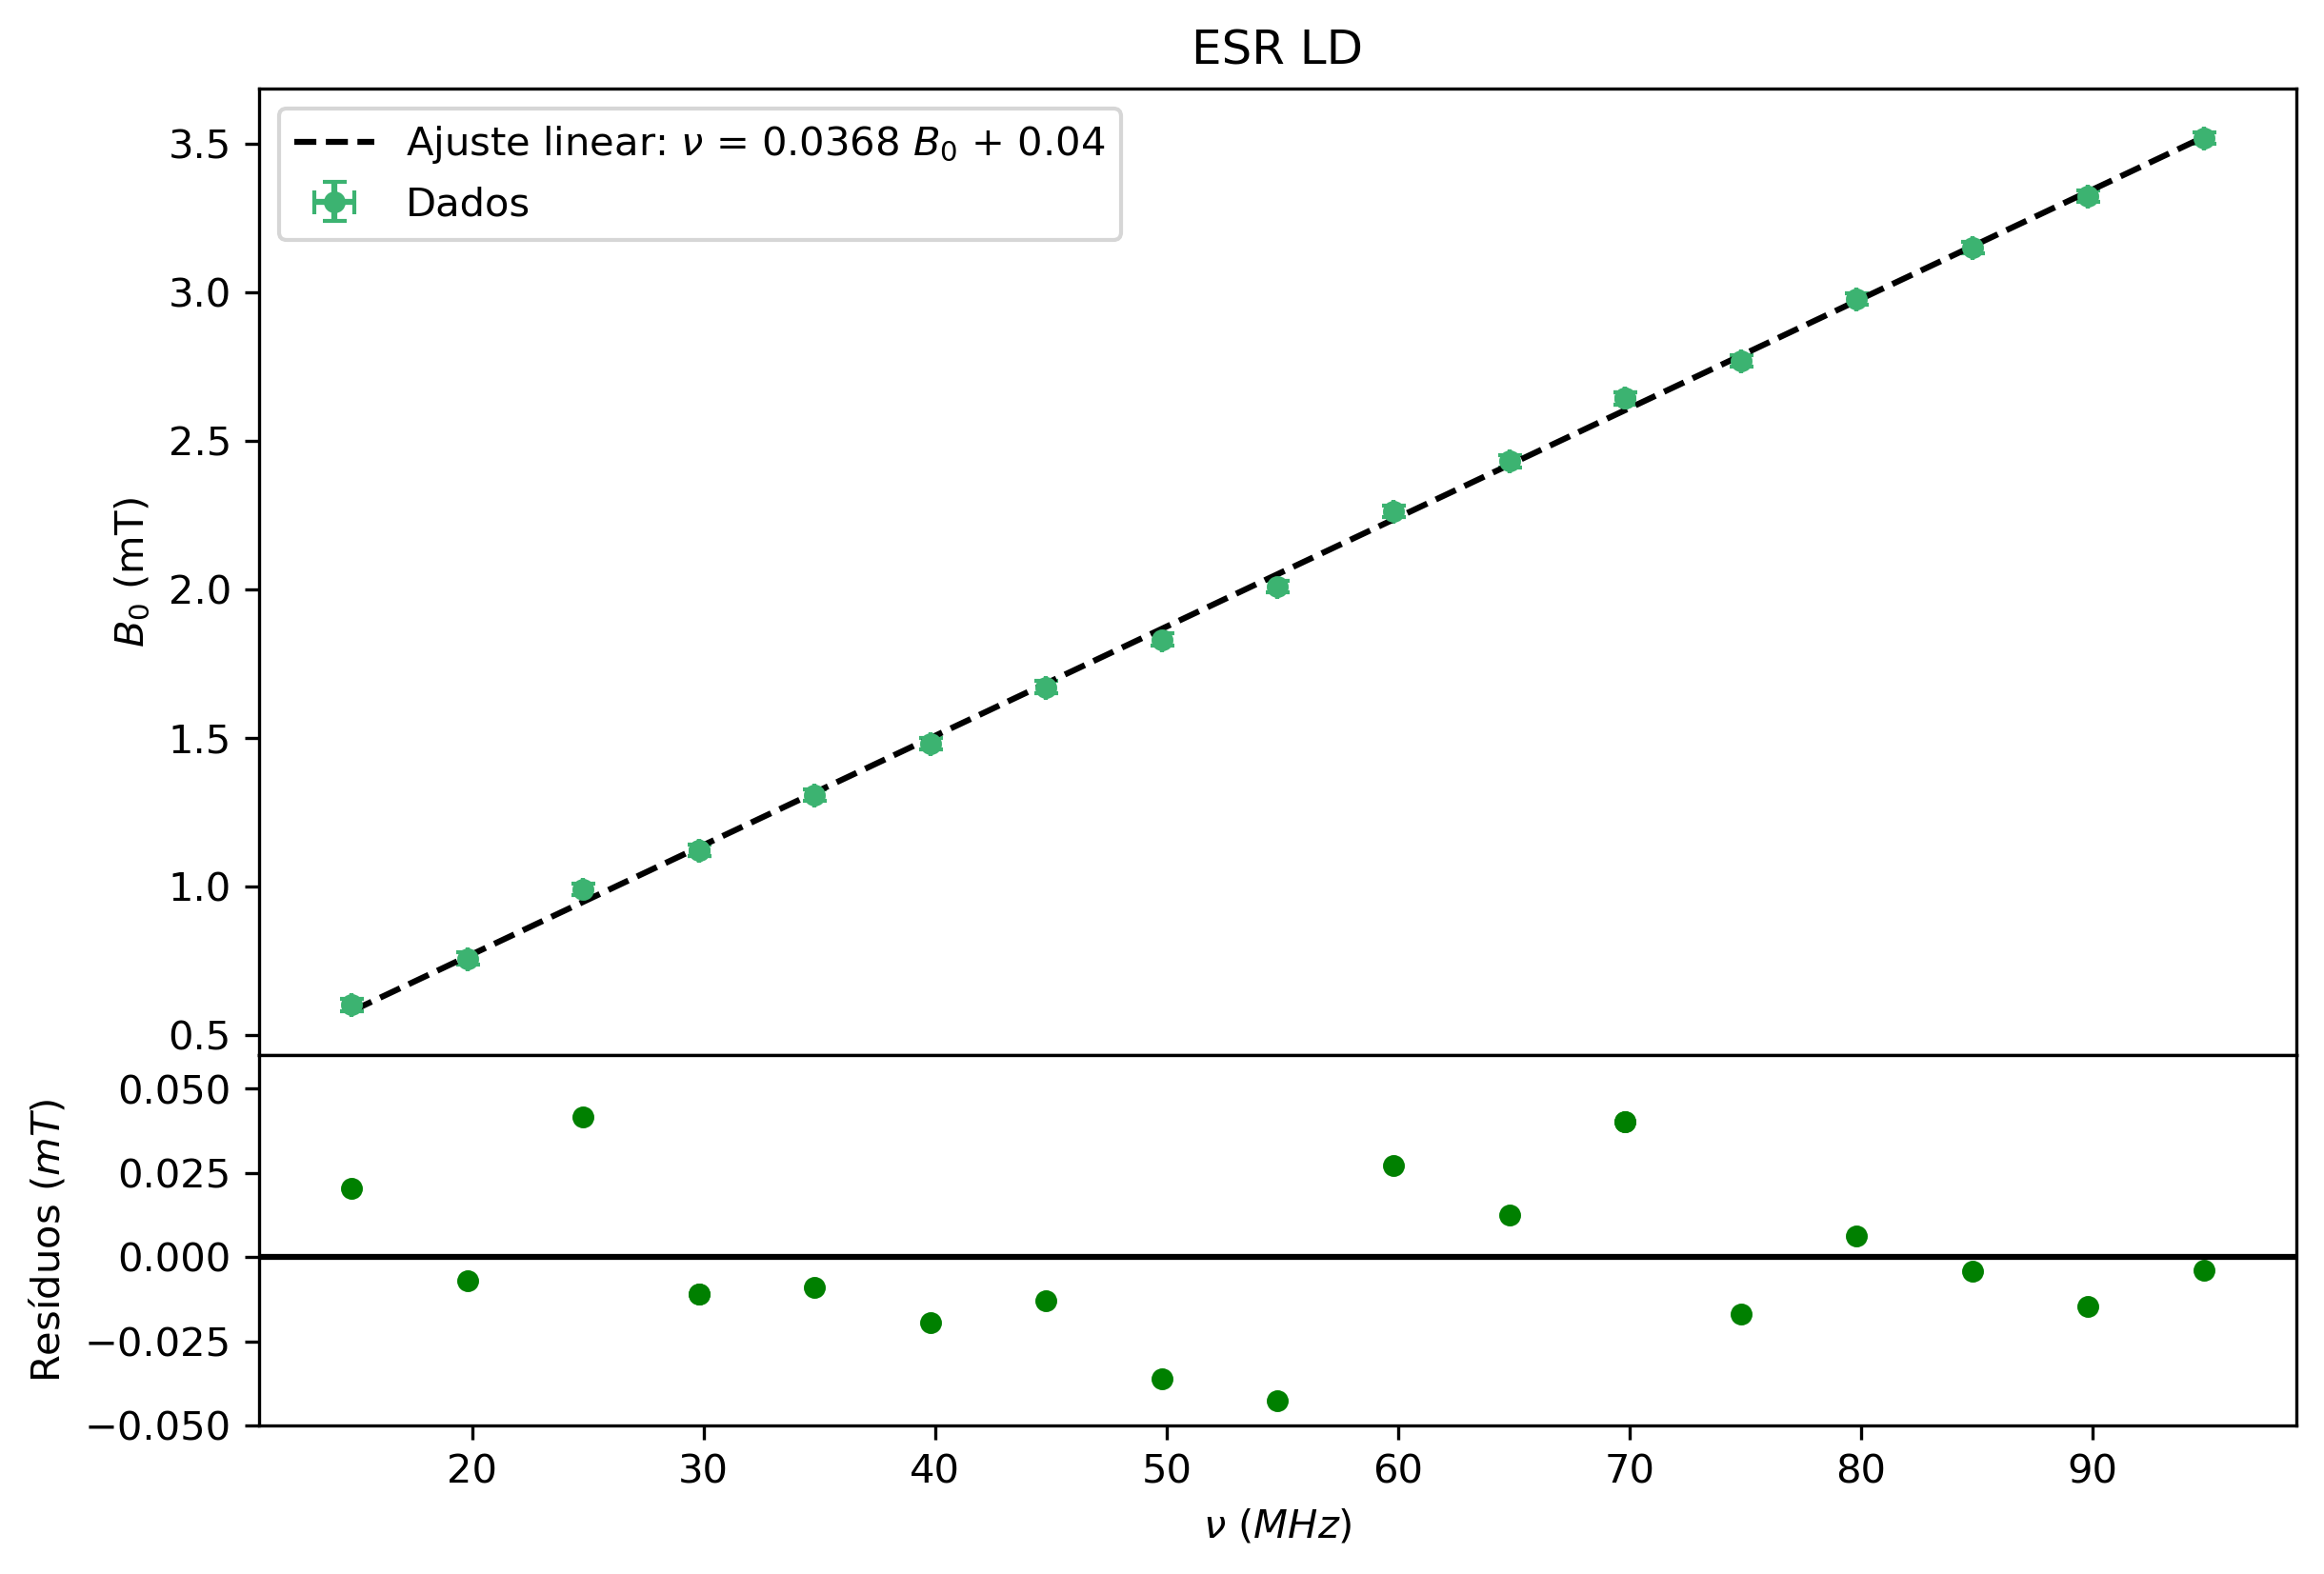

In [16]:
# Calulando chi^2_red
yhat1 = np.polyval(fitpars1, nu)
chi_squared = np.sum(((yhat1 - b)/sigma_b) ** 2)
chi2_red = chi_squared/(len(b)-2)

#Imprimindo o resultado
print("chi^2_red = %.3f" % chi2_red)

fig = plt.figure(figsize = [9.2,6.2], dpi = 300) 
gs = fig.add_gridspec(2,1, hspace=0, height_ratios=[6, 2.3])
axs = gs.subplots(sharex=True)


#Gráfico principal
axs[0] = plt.subplot(gs[0])
axs[0].errorbar(nu,b, sigma_b,0, 'o', ms = 4.5, capsize=3, color = 'mediumseagreen', label = 'Dados')
axs[0].plot(nu,nu*coef_angular1 + coef_linear1, color ='black', ls = '--',
         label = r'Ajuste linear: $\nu$ = %.4f $B_0$ + %.2f' % (coef_angular1,abs(coef_linear1)))
axs[0].set_ylabel(r'$B_0$ (mT)')
axs[0].legend()
axs[0].set_title('ESR LD')

#Gráfico de resíduos
axs[1] = plt.subplot(gs[1])
resid = (b - yhat1)
axs[1].plot(nu, resid, 'o',ms = 4.5,  color = 'green', label = 'Residuos')
axs[1].axhline(y=0, color='k', linestyle='-')
axs[1].set_ylabel(r"Resíduos ($mT$)")
axs[1].set_ylim([-0.05,0.06])
axs[1].set_yticks(np.arange(-0.050,0.060,0.025))



plt.xlabel(r'$\nu$ ($MHz$)')
plt.savefig('Graphs/ESR/AjusteResiduos_LD.pdf', dpi = 300)

plt.show()

## Calculando o fator de Landé

In [29]:
mu_b = 9.274e-24 #J/T
h = 6.626e-34 #Js

g1 = h/(mu_b * coef_angular1 * 1e-9)

sigma_g1 = h/(mu_b * (coef_angular1*1e-9)**2) * (sigma_angular1*1e-9)
sigma_g1 = float('{:g}'.format(float('{:.1g}'.format(sigma_g1))))

print('g = (%.2f +- %.2f)' %(g1,sigma_g1))

g = (1.94 +- 0.01)


In [30]:
print(abs(1 - 1.94/g_lande))

0.03112555588764332


In [19]:
print(4* np.pi * 1e-7 * (4/5)**(3/2) * 320/0.068)

0.0042314178144621795


In [39]:
prop = 1/2 * np.sqrt(0.01**2 + 0.03**2)

std = np.std([1.96,1.94])

s = np.sqrt(prop**2 + std**2)

print(np.round(s,2))

0.02


In [42]:
print(np.mean([1.96, 1.94]))



print(abs(1 - 1.95/g_lande))

1.95
0.02612935122089466
